In [29]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [30]:
# IRIS Plants Dataset
# skdata = datasets.load_iris()

# Breast Cancer Dataset
skdata = datasets.load_breast_cancer()

# Digits Dataset
# skdata = datasets.load_digits()

# Wine Dataset
# skdata = datasets.load_wine()

# Hayes-Roth Data Set: https://archive.ics.uci.edu/ml/datasets/Hayes-Roth
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/hayes-roth/hayes-roth.data', header=None)
# ndf = df.iloc[:, 1:] # Remove first column of user names
# x, y = ndf.iloc[:, :-1], np.array(ndf.iloc[:, -1]) # Split dataframe into data and target columns

# Standard Scaling
# x = StandardScaler().fit_transform(skdata.data)
# y = skdata.target

# MinMax Scaling
# x = MinMaxScaler().fit_transform(skdata.data)
# y = skdata.target

x = skdata.data
y = skdata.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=56)

print('Train Data - ', x_train.shape, y_train.shape)
print('Test Data  - ', x_test.shape, y_test.shape)

Train Data -  (398, 30) (398,)
Test Data  -  (171, 30) (171,)


# Classifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=2).fit(x_train, y_train)
y_pred = knn.predict(x_test)

# Performance Metrics

In [32]:
print('Accuracy  - ', accuracy_score(y_test, y_pred))
print('MSE       - ', mean_squared_error(y_test, y_pred))
print('F1 Score  - ', f1_score(y_test, y_pred))
print('Precision - ', precision_score(y_test, y_pred))
print('Recall    - ', recall_score(y_test, y_pred))

Accuracy  -  0.9122807017543859
MSE       -  0.08771929824561403
F1 Score  -  0.922279792746114
Precision -  0.9368421052631579
Recall    -  0.9081632653061225


Confusion Matrix
[[67  6]
 [ 9 89]]


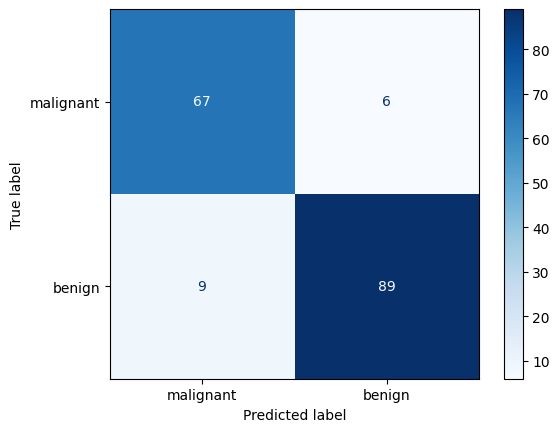

TPR -  0.9081632653061225
FPR -  0.0821917808219178
TNR -  0.9178082191780822
FNR -  0.09183673469387756


In [33]:
def get_cm_metrics(cnf_matrix):
  TN, FP, FN, TP = cnf_matrix.ravel()
  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  # Specificity or true negative rate
  TNR = TN/(TN+FP)
  # Fall out or false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)
  return TPR, FPR, TNR, FNR

print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=skdata.target_names)
disp.plot(cmap='Blues', xticks_rotation='horizontal')
plt.show()

TPR, FPR, TNR, FNR = get_cm_metrics(cm)
print('TPR - ', TPR)
print('FPR - ', FPR)
print('TNR - ', TNR)
print('FNR - ', FNR)

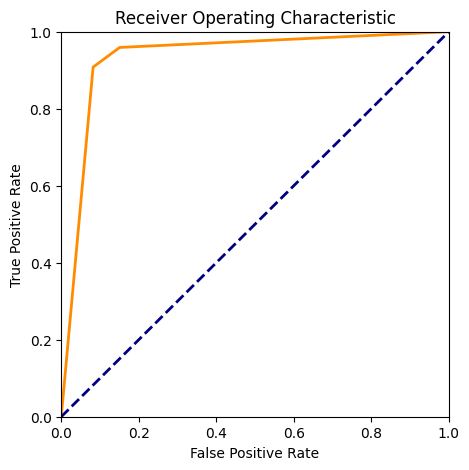

In [39]:
y_score = knn.predict_proba(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])

plt.figure(dpi=100, figsize=(5, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.show()

# Cross Validation

In [21]:
# IRIS Plants Dataset
skdata = datasets.load_iris()

# Breast Cancer Dataset
# skdata = datasets.load_breast_cancer()

# Digits Dataset
# skdata = datasets.load_digits()

# Wine Dataset
# skdata = datasets.load_wine()

# Hayes-Roth Data Set: https://archive.ics.uci.edu/ml/datasets/Hayes-Roth
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/hayes-roth/hayes-roth.data', header=None)
# ndf = df.iloc[:, 1:] # Remove first column of user names
# x, y = ndf.iloc[:, :-1], np.array(ndf.iloc[:, -1]) # Split dataframe into data and target columns

# Standard Scaling
# x = StandardScaler().fit_transform(skdata.data)
# y = skdata.target

# MinMax Scaling
# x = MinMaxScaler().fit_transform(skdata.data)
# y = skdata.target

x = skdata.data
y = skdata.target

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=56)

# print('Train Data - ', x_train.shape, y_train.shape)
# print('Test Data  - ', x_test.shape, y_test.shape)

In [26]:
knn = KNeighborsClassifier(n_neighbors=2)
scores = cross_val_score(knn, x, y, cv=5)
print('Scores  - ', scores)
print('Average - ', np.mean(scores))

Scores  -  [0.96666667 0.93333333 0.93333333 0.9        1.        ]
Average -  0.9466666666666665


In [27]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, x, y, cv=5)
print('Scores  - ', scores)
print('Average - ', np.mean(scores))

Scores  -  [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Average -  0.9666666666666668
